# Извлучение доступных наборов данных из библиотеки tensouflow_datasets

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
np.set_printoptions(precision=3)

In [4]:
import tensorflow_datasets as tfds

Список доступных наборов данных

In [5]:
print(len(tfds.list_builders()))

1310


In [6]:
print(tfds.list_builders()[:5])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


## Извлечение набора данных

### Первый подход

- Вызов функции построителя набора данных
- Выполнение метода `downoad_and_prepare()`
- Вызов метода `as_dataset()`

In [38]:
# Набор данных CelebA
beans_bldr = tfds.builder('beans')

In [39]:
# Описание
print(beans_bldr.info.features)

FeaturesDict({
    'image': Image(shape=(500, 500, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


In [42]:
print(beans_bldr.info.features['image'])

Image(shape=(500, 500, 3), dtype=uint8)


In [43]:
print(beans_bldr.info.citation)

@ONLINE {beansdata,
    author="Makerere AI Lab",
    title="Bean disease dataset",
    month="January",
    year="2020",
    url="https://github.com/AI-Lab-Makerere/ibean/"
}


Метод `download_and_prepare()` загрузит данные и сохранит их на диске в указанном подкаталоге для всех наборов данных TensorFlow

In [44]:
beans_bldr.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/andrew/tensorflow_datasets/beans/incomplete.3578ZS_0.1.0/beans-train.tfrecord*...:   0%|      …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/andrew/tensorflow_datasets/beans/incomplete.3578ZS_0.1.0/beans-validation.tfrecord*...:   0%| …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/andrew/tensorflow_datasets/beans/incomplete.3578ZS_0.1.0/beans-test.tfrecord*...:   0%|       …

Dataset beans downloaded and prepared to /home/andrew/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


Создаем объект набора данных

In [61]:
datasets = beans_bldr.as_dataset(shuffle_files=False)
datasets.keys()

dict_keys([Split('train'), Split('validation'), Split('test')])

In [62]:
ds_tranin = datasets['train']
assert isinstance(ds_tranin, tf.data.Dataset)

example = next(iter(ds_tranin))
print(type(example))

<class 'dict'>


In [63]:
print(example.keys())

dict_keys(['image', 'label'])


In [64]:
ds_tranin = ds_tranin.map(lambda item:
                        (item['image'],
                         tf.cast(item['label'], tf.int32)))

In [66]:
ds_tranin = ds_tranin.batch(18)
images, labels = next(iter(ds_tranin))
print(images.shape, labels)

(18, 500, 500, 3) tf.Tensor([1 1 0 0 1 0 0 0 0 1 0 0 0 2 2 1 1 0], shape=(18,), dtype=int32)


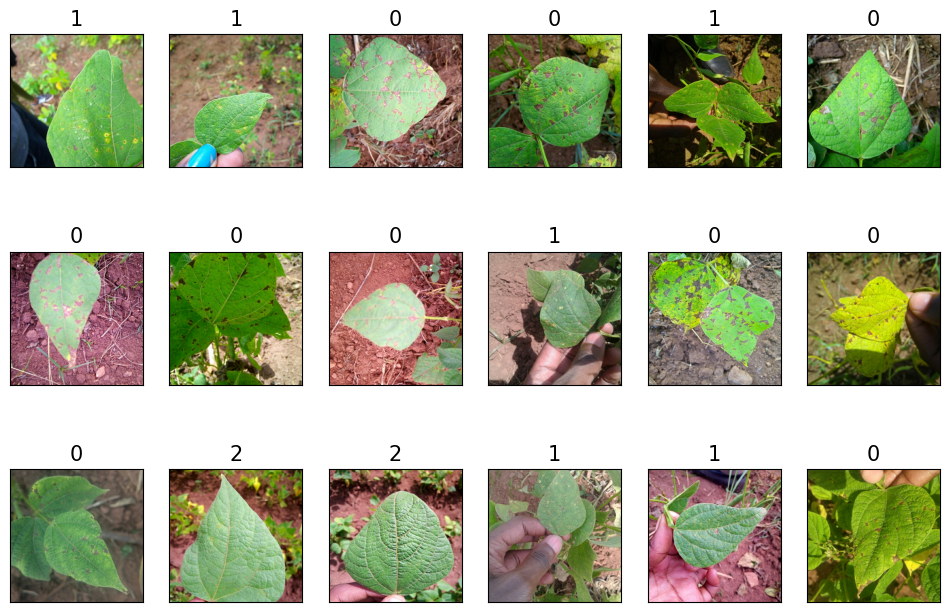

In [69]:
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in enumerate(zip(images, labels)):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title('{}'.format(label), size=15)
plt.show()    